<a href="https://colab.research.google.com/github/faithrts/COMP-551/blob/faith-branch-testing/A3_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up

In [2]:
### importing libraries and setting the random seed

import numpy as np
import pandas as pd
import sys

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from matplotlib import cm

import re
import math
from importlib import reload
from typing import List
from tqdm import tqdm
from enum import Enum
from numpy.random import RandomState

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1234)
random_state = RandomState(1234)

# a folder to store the saved graphs
!mkdir images

mkdir: cannot create directory ‘images’: File exists


# Data Handling

### Helper functions

#### Loading and cleaning data

In [3]:
# assumes the last column of the dataframe is the labels
def x_y_from_df(df):
  x = df.iloc[:, :-1].to_numpy()
  y = df.iloc[:, -1].to_numpy()

  return x, y

In [4]:
def center_array(arr):
  mean = np.mean(arr)
  return_arr = np.array(arr) - mean
  # return_arr = [item - mean for item in arr]

  return return_arr

In [5]:
def normalize_array(arr):
  std = np.std(arr)
  return_arr = np.array(arr) / std
  # return_arr = [item / std for item in arr]

  return return_arr

In [6]:
# pre-processes the df by performing mean subtraction and normalization
def preprocess_df(df):
  preprocessed_df = df.copy()

  for col in preprocessed_df.iloc[:, :-1]:
    preprocessed_col = normalize_array(center_array(df[col]))
    preprocessed_df[col] = preprocessed_col

  return preprocessed_df

In [7]:
# pre-processes the df by performing mean subtraction
def preprocess_df_no_normalization(df):
  preprocessed_df = df.copy()

  for col in preprocessed_df.iloc[:, :-1]:
    preprocessed_col = center_array(df[col])
    preprocessed_df[col] = preprocessed_col

  return preprocessed_df

#### Plotting graphs

In [8]:
def plot_label_distributions(label_arr, dataset_name, labels = 0):
  
  # creates the plot
  plt.figure(figsize = (10,4))
  width = 0.6

  unique_labels = list(set(label_arr))
  counts = []

  for label in unique_labels:
    count = label_arr.count(label)
    counts.append(count)

  if labels == 0:
    labels = [str(label) for label in unique_labels]

  # the colour codes of the bars
  colours = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6',
            '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

  plt.bar(labels, counts, width, color = colours)
  plt.title("Distribution of Class Labels in " + dataset_name + " Dataset")
  plt.xlabel("Label")
  plt.ylabel("Count")

  for index, value in enumerate(counts):
    plt.text(index - 0.24, value + 5, str(round(value, 2)))

  plt.show()

## Importing

In [9]:
# clones the github repo
!git clone https://github.com/zalandoresearch/fashion-mnist
sys.path.insert(1, 'fashion-mnist/utils')

# imports the mnist reader from the repo
import mnist_reader

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


### Loading and cleaning data

In [10]:
### loading the data using the github repo's mnist_reader.load_mnist

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# training data
x_train_temp, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind = 'train')

# testing data
x_test_temp, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind = 't10k')

In [11]:
### creating dataframes to better understand data

# training dataframe
train_temp_df = pd.DataFrame(x_train_temp)
train_temp_df['LABEL'] = y_train

# testing dataframe
test_temp_df = pd.DataFrame(x_test_temp)
test_temp_df['LABEL'] = y_test

In [12]:
train_temp_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,LABEL
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


In [13]:
### centering and normalizing the data

# pre-processing each dataframe
train_df = preprocess_df(train_temp_df)
test_df = preprocess_df(test_temp_df)

# extracting arrays for x_train, y_train, x_test, y_test
x_train, y_train = x_y_from_df(train_df)
x_test, y_test = x_y_from_df(test_df)

In [14]:
### saving a copy of the un-preprocessed (centered and normalized) data

x_train_unprocessed, _ = x_y_from_df(train_temp_df)
x_test_unprocessed, _ = x_y_from_df(test_temp_df)

In [15]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,LABEL
0,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,-0.377827,...,-0.474798,-0.394260,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,9
1,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,0.100437,-0.098878,-0.156653,-0.239080,-0.377827,...,1.857395,2.697741,1.324682,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,0
2,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,0.198023,...,-0.474798,-0.370475,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,0
3,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,1.145393,2.134974,...,-0.474798,-0.394260,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,3
4,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,-0.377827,...,-0.474798,-0.394260,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,-0.377827,...,-0.474798,-0.394260,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,5
59996,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,-0.377827,...,-0.474798,-0.394260,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,1
59997,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,-0.246952,...,-0.474798,-0.394260,-0.406094,-0.441358,-0.396626,-0.288156,-0.156811,-0.089673,-0.034147,3
59998,-0.008644,-0.023223,-0.039178,-0.041322,-0.057646,-0.071167,-0.098878,-0.156653,-0.239080,-0.377827,...,0.629925,0.794971,-0.292227,-0.441358,-0.374489,-0.288156,-0.156811,-0.089673,-0.034147,0


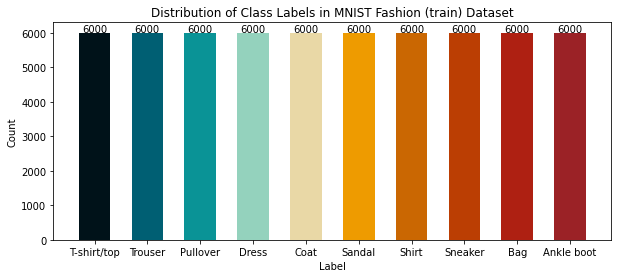

In [16]:
# plotting label distributions for training data
plot_label_distributions(train_df['LABEL'].tolist(), 'MNIST Fashion (train)', labels)

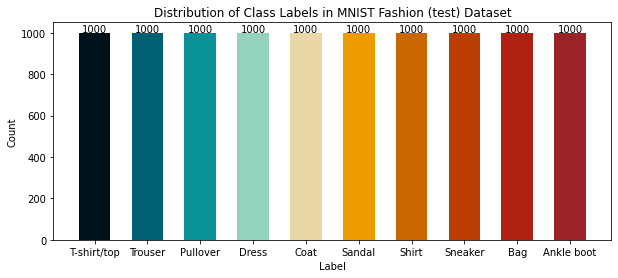

In [17]:
# plotting label distributions for testing data
plot_label_distributions(test_df['LABEL'].tolist(), 'MNIST Fashion (test)', labels)

# Implementing models

## Helper functions

## Layers

In [18]:
class NeuralNetLayer:
  def __init__(self):
    self.gradient = None
    self.parameters = None
        
  def forward(self, x):
    raise NotImplementedError

  def backward(self, gradient):
    raise NotImplementedError

In [19]:
class LinearLayer(NeuralNetLayer):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.ni = input_size
    self.no = output_size

    sigma = 0.1
    self.w = sigma * random_state.randn(output_size, input_size)
    self.b = sigma * random_state.randn(output_size)
    self.cur_input = None
    self.parameters = [self.w, self.b]

  # x is the data inputted into this layer during predictions;
  # unless this is the input layer, x is the original data inputted
  # into the model, but transformed by the preceding layers
  def forward(self, x):
    self.cur_input = x
    return (self.w[None, :, :] @ x[:, :, None]).squeeze() + self.b

  def backward(self, gradient):
    assert self.cur_input is not None, "Must call forward before backward"
    #dw = gradient.dot(self.cur_input)
    dw = gradient[:, :, None] @ self.cur_input[:, None, :]
    db = gradient
    self.gradient = [dw, db]
    return gradient.dot(self.w)

In [20]:
class ReLULayer(NeuralNetLayer):
  def __init__(self):
    super().__init__()
        
  def forward(self, x):
    self.gradient = np.where(x > 0, 1.0, 0.0)

    activated_x = np.maximum(0, x)
    return activated_x

  def backward(self, gradient):
    assert self.gradient is not None, "Must call forward before backward"
    return gradient * self.gradient

In [21]:
class LeakyReLULayer(NeuralNetLayer):
  def __init__(self):
    super().__init__()
        
  def forward(self, x):
    self.gradient = np.where(x > 0, 1.0, 0.01)

    # activated_x = [[float(element) if element > 0 else float(element) * 0.01 for element in sublist] for sublist in x]
    activated_x = np.maximum(0.01 * x, x)
    return activated_x

  def backward(self, gradient):
    assert self.gradient is not None, "Must call forward before backward"
    return gradient * self.gradient

In [22]:
class TanhLayer(NeuralNetLayer):
  def __init__(self):
    super().__init__()
        
  def forward(self, x):
    self.gradient = 1 - (np.tanh(x) ** 2)

    activated_x = np.tanh(x)
    return activated_x

  def backward(self, gradient):
    assert self.gradient is not None, "Must call forward before backward"
    return gradient * self.gradient

In [96]:
class SoftmaxOutputLayer(NeuralNetLayer):
  def __init__(self):
    super().__init__()
    self.cur_probs = None

  def forward(self, x):
    exps = np.exp(x)
    #exps2 = copy.deepcopy(exps)
    #print(np.sum(exps, axis=-1))[:, None]
    probs = exps / np.sum(exps, axis=-1)[:, None]
    print(probs)
    self.cur_probs = probs
    return probs

  def backward(self, target):
    assert self.cur_probs is not None, "Must call forward before backward"
    return self.cur_probs - target

## MLP

In [24]:
class MLP:
  def __init__(self, n_features, n_output, hidden_layers = 0, hidden_units = [0], activation_func = "None"):
    layers_list = []

    # adds the input layer
    if hidden_layers == 0:
      layers_list.append(LinearLayer(n_features, n_output))
    else:
      layers_list.append(LinearLayer(n_features, hidden_units[0]))

    # adds the hidden layers
    for i in range(hidden_layers):

      # adds activation function layers
      if activation_func.upper() == "RELU":
        layers_list.append(ReLULayer())
      elif activation_func.upper() == "TANH":
        layers_list.append(TanhLayer())
      elif activation_func.upper() == "LEAKY RELU":
        layers_list.append(LeakyReLULayer())

      # if this is the last hidden layer, it outputs the output size
      if i == hidden_layers - 1:
        layers_list.append(LinearLayer(hidden_units[i], n_output))
        continue
          
      # if this is not the last hidden layer, it outputs the hidden size
      layers_list.append(LinearLayer(hidden_units[i], hidden_units[i + 1]))
          
    # adds the output layer
    layers_list.append(SoftmaxOutputLayer())

    self.layers = layers_list

  def forward(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def backward(self, target):
    for layer in self.layers[::-1]:
      target = layer.backward(target)

  def fit(self, x_train, y_train, x_test, y_test, opt, lambda_reg = 0, track_accuracy = False):    
    # one-hot encodes the labels
    labels_count = len(set(y_train))
    labels = np.eye(labels_count)[np.array(y_train)]

    loss = 0
    train_acc = 0
    test_acc = 0

    prediction_probs = self.forward(x_train)

    # back propagates
    self.backward(labels)
    opt.step()

    # calculates the loss
    loss = self.evaluate_loss(prediction_probs, labels, lambda_reg)

    ### calculates the training and testing accuracy
    if track_accuracy:
      # calculates the predicted labels using the current model weights
      train_pred = self.predict(x_train)
      test_pred = self.predict(x_test)

      # evaluates the training and testing accuracy
      train_acc = evaluate_acc(train_pred, y_train)
      test_acc = evaluate_acc(test_pred, y_test)

    # returns the CE loss, training accuracy, and testing accuracy
    return loss, train_acc, test_acc

  def fit_mini_batch(self, x_train, y_train, x_test, y_test, opt, batch_size, lambda_reg = 0, track_acc = False):    
    # one-hot encodes the labels
    labels_count = len(set(y_train))
    labels = np.eye(labels_count)[np.array(y_train)]

    # the number of instances in each batch
    batch_count = int(len(x_train) / batch_size)

    # the index at which the current batch starts (updated in the for loop)
    start_index = 0

    loss = 0
    train_acc = 0
    test_acc = 0

    # updating the model weights for each batch of training data
    for i in range(batch_count):

      # the index at which the current batch ends
      end_index = batch_size * (i + 1)
      if(i == batch_count - 1):
        # if this is the last batch, take all the training data from start_index to -1
        end_index = -1

      # isolates the current batch of training data and associated labels
      batch = x_train[start_index : end_index]
      batch_labels = labels[start_index : end_index]

      # updates the start index for the next batch (next iteration in the for loop)
      start_index = end_index

      # calculates the class predictions
      prediction_probs = self.forward(batch)

      # back propagates
      self.backward(batch_labels)
      opt.step()

    # calculates the loss
    prediction_probs = self.forward(x_train)
    loss = self.evaluate_loss(prediction_probs, labels, lambda_reg)

    if track_acc:
      # calculates the training and testing accuracy
      train_pred = self.predict(x_train)
      test_pred = self.predict(x_test)
      
      train_acc = evaluate_acc(train_pred, y_train)
      test_acc = evaluate_acc(test_pred, y_test)

    # returns the CE loss, training accuracy, and testing accuracy
    return loss, train_acc, test_acc

  def fit_epoch_mini_batch(self, x_train, y_train, x_test, y_test, opt, batch_size, epochs, lambda_reg, track_acc):
    losses = []
    train_accs = []
    test_accs = []

    indices = np.arange(0, len(x_train))

    for epoch in range(epochs):
      random_state.shuffle(indices)
      x_train_shuf = x_train[indices]
      y_train_shuf = y_train[indices]

      loss, train_acc, test_acc = self.fit_mini_batch(x_train_shuf, y_train_shuf, x_test, y_test, opt, batch_size, lambda_reg, track_acc)

      # taking the last loss, training accuracy, and testing accuracy values
      losses.append(loss)
      train_accs.append(train_acc)
      test_accs.append(test_acc)
    
    return losses, train_accs, test_accs

  def evaluate_loss(self, prediction_probs, labels, lambda_reg):
    # adds regularization term (0 by default)
    reg_term = lambda_reg
    if lambda_reg != 0:
      weights_sum = 0

      # iterates through the layers in the model and adds the weights
      for layer in self.layers[::-1]:
        # if the layer is a LinearLayer, it has weights
        if type(layer).__name__ == "LinearLayer":
          weights_squared = layer.w ** 2
          weights_sum += sum(sum(weights_squared))

      reg_term = (lambda_reg * weights_sum)

    ### calculates the loss, adds it to the losses list, and back propagates based on the loss
    loss = -(labels * np.log(prediction_probs)).sum(axis=-1).mean() + reg_term

    return loss

  def evaluate_initial_metrics(self, x_train, x_test, y_train, y_test, lambda_reg):
    # evaluating the CE loss based on the predicted class probabilities
    labels_count = len(set(y_train))
    labels = np.eye(labels_count)[np.array(y_train)]
    prediction_probs = self.forward(x_train)
    loss = self.evaluate_loss(prediction_probs, labels, lambda_reg)

    # evaluates the training and testing classification accuracy
    train_pred = self.predict(x_train)
    test_pred = self.predict(x_test)
    train_acc = evaluate_acc(train_pred, y_train)
    test_acc = evaluate_acc(test_pred, y_test)

    return loss, train_acc, test_acc

  def predict(self, x):
    pred_prob = self.forward(x)
    predictions = np.argmax(pred_prob, axis = -1)
    return predictions

In [25]:
class Optimizer:
    def __init__(self, net: MLP):
        self.net = net

    def step(self):
        for layer in self.net.layers[::-1]:
            if layer.parameters is not None:
                self.update(layer.parameters, layer.gradient)

    def update(self, params, gradient):
        raise NotImplementedError

class GradientDescentOptimizer(Optimizer):
    def __init__(self, net: MLP, lr: float):
        super().__init__(net)
        self.lr = lr

    def update(self, params, gradient):
        for (p, g) in zip(params, gradient):
            p -= self.lr * g.mean(axis=0)

# Running experiments

### Helper functions

In [26]:
def evaluate_acc(true_labels, target_labels):
  # the number of labels
  label_count = true_labels.shape[0]

  # the accuracy is the number of correctly labelled instances divided
  # by the total number of instances
  accuracy = np.sum(target_labels == true_labels) / label_count

  return accuracy

In [60]:
def plot_losses(losses, hidden_layer_count, activation_func):
  x_axis = np.arange(1, len(losses) + 1, dtype = int)
  plt.plot(x_axis, losses)

  plt.figure(figsize=(8, 4))

  # changing the title based on whether there are hidden layers
  if hidden_layer_count == 0:
    plt.title("Cross-entropy training loss for " + str(hidden_layer_count) + " hidden layers")
  else:
    plt.title("Cross-entropy training loss for " + str(hidden_layer_count) + " hidden layer(s) with " + activation_func)
    
  plt.xlabel("Epoch")
  plt.xticks(x_axis, map(str, x_axis))
  plt.ylabel("Cross-entropy loss")

In [59]:
def plot_train_test_acc(train_accs, test_accs, hidden_layer_count, activation_func):
  x_axis = np.arange(1, len(train_accs) + 1, dtype = int)

  plt.figure(figsize=(8, 4))

  plt.plot(x_axis, train_accs, label = "Training accuracy")
  plt.plot(x_axis, test_accs, label = "Testing accuracy")

  # changing the title based on whether there are hidden layers
  if hidden_layer_count == 0:
    plt.title("Training and testing accuracy for " + str(hidden_layer_count) + " hidden layers")
  else:
    plt.title("Training and testing accuracy for " + str(hidden_layer_count) + " hidden layer(s) with " + activation_func)
    
  plt.xlabel("Epoch")
  plt.xticks(x_axis, map(str, x_axis))
  plt.ylabel("Classification accuracy")
  plt.legend()

In [58]:
def epoch_mini_batch(x_train, y_train, x_test, y_test, hidden_layers, hidden_units, activation_func, lr, batch_size, epochs, lambda_reg = 0, track_loss = False, track_acc = False):
  n_features = x_train.shape[-1]
  n_output = len(set(y_train))

  # creates the mlp and optimizer objects
  mlp = MLP(n_features, n_output, hidden_layers, hidden_units, activation_func)
  opt = GradientDescentOptimizer(mlp, lr)

  # saving the initial loss, training accuracy, and testing accuracy
  initial_loss, initial_train_acc, initial_test_acc = mlp.evaluate_initial_metrics(x_train, x_test, y_train, y_test, lambda_reg)

  # training the model using mini-batch times epochs
  losses, train_accs, test_accs = mlp.fit_epoch_mini_batch(x_train, y_train, x_test, y_test, opt, batch_size, epochs, lambda_reg, track_acc)

  #losses.insert(0, initial_loss)

  # the number of hidden layers
  hidden_layer_count = int((len(mlp.layers) - 2) / 2)

  # plots the cross-entropy loss
  if track_loss:
    plot_losses(losses, hidden_layer_count, activation_func)
    
  # plots the training and testing accuracy
  if track_acc:
    plot_train_test_acc(train_accs, test_accs, hidden_layer_count, activation_func)

  return mlp

In [57]:
def evaluate_mlp_acc(mlp: MLP, x_train, y_train, x_test, y_test, silent = True):
  train_predictions = mlp.predict(x_train)
  test_predictions = mlp.predict(x_test)
  
  train_acc = evaluate_acc(train_predictions, y_train)
  test_acc = evaluate_acc(test_predictions, y_test)
  
  if not silent:
    print("The accuracy of the model on the training data: " + str(round((train_acc * 100), 2)) + "%")
    print("The accuracy of the model on the testing data: " + str(round((test_acc * 100), 2)) + "%")
    print("\n")

  return train_acc, test_acc
                     

### Baseline accuracy tests



In [98]:
### plotting training and testing for 0 hidden layers (ReLU)

mlp0_test = epoch_mini_batch(x_train, y_train, x_test, y_test, 0, [], "ReLU", 0.1, 2, 1, track_acc = True)
acc0_test = evaluate_mlp_acc(mlp0_test, x_train, y_train, x_test, y_test, silent = False)

Streaming output truncated to the last 5000 lines.
  9.99994030e-01 4.33777749e-23 5.39782101e-20 5.09261194e-36
  1.67786955e-23 4.69763351e-40]
 [6.32266810e-47 4.57761987e-44 6.11162122e-28 1.00000000e+00
  9.89940583e-28 4.59057110e-56 5.16416232e-24 2.08254970e-38
  1.69526164e-45 6.07208679e-45]]
[[1.14346083e-44 7.58729718e-51 1.04001439e-65 8.52016478e-43
  9.02469311e-64 1.49380193e-13 5.04059772e-61 1.00000000e+00
  2.97050669e-27 2.80107164e-13]
 [9.61380619e-62 3.46313371e-71 4.61591359e-97 1.52228996e-75
  1.36081179e-69 1.42749538e-30 8.32240385e-93 9.99999998e-01
  4.05730240e-17 1.56656317e-09]]
[[4.53191446e-068 4.16578569e-090 8.29674761e-110 7.87973632e-092
  2.08209943e-091 4.68134681e-047 1.55309688e-104 3.47069831e-050
  6.37781591e-044 1.00000000e+000]
 [2.25114131e-017 1.23303560e-015 2.22764804e-014 9.99999731e-001
  2.47151619e-007 3.86597322e-029 2.16620559e-008 2.20549217e-011
  1.63984403e-011 1.09439969e-032]]
[[4.78553618e-70 6.45158018e-43 7.19694440e-42

KeyboardInterrupt: ignored

The accuracy of the model on the training data: 86.18%
The accuracy of the model on the testing data: 83.95%




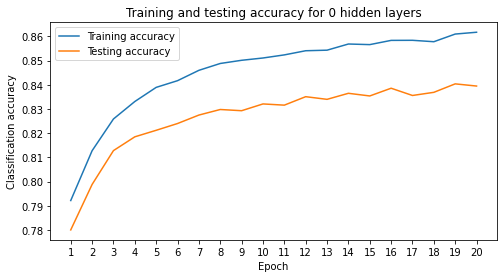

In [61]:
### plotting training and testing for 0 hidden layers (ReLU)

mlp0_test = epoch_mini_batch(x_train, y_train, x_test, y_test, 0, [], "ReLU", 0.1, 1000, 20, track_acc = True)
acc0_test = evaluate_mlp_acc(mlp0_test, x_train, y_train, x_test, y_test, silent = False)

The accuracy of the model on the training data: 86.04%
The accuracy of the model on the testing data: 83.91%




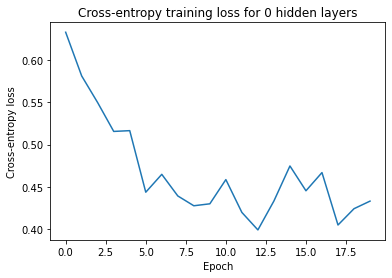

In [ ]:
### plotting loss for 0 hidden layers (ReLU)

mlp0 = epoch_mini_batch(x_train, y_train, x_test, y_test, 0, [], "ReLU", 0.1, 1000, 20, track_loss = True)
acc0 = evaluate_mlp_acc(mlp0, x_train, y_train, x_test, y_test, silent = False)

The accuracy of the model on the training data: 89.01%
The accuracy of the model on the testing data: 86.15%




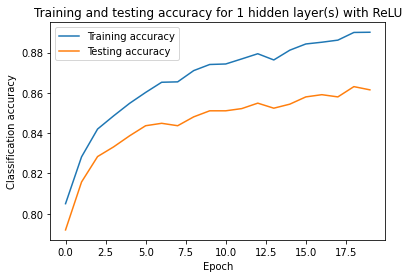

In [ ]:
### plotting training and testing accuracy for 1 hidden layer (ReLU)

mlp1_test = epoch_mini_batch(x_train, y_train, x_test, y_test, 1, [128], "ReLU", 0.1, 1000, 20, track_acc = True)
acc1_test = evaluate_mlp_acc(mlp1_test, x_train, y_train, x_test, y_test, silent = False)

The accuracy of the model on the training data: 89.0%
The accuracy of the model on the testing data: 86.56%




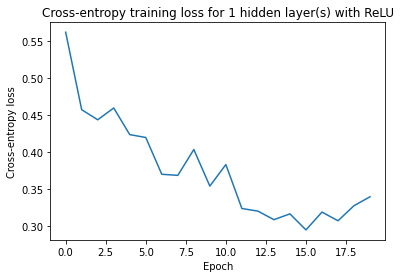

In [ ]:
### plotting loss for 1 hidden layer (ReLU)

mlp1 = epoch_mini_batch(x_train, y_train, x_test, y_test, 1, [128], "ReLU", 0.1, 1000, 20, track_loss = True)
acc1 = evaluate_mlp_acc(mlp1, x_train, y_train, x_test, y_test, silent = False)

The accuracy of the model on the training data: 90.04%
The accuracy of the model on the testing data: 86.59%




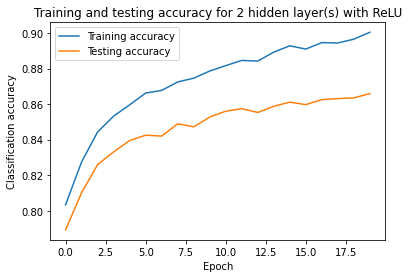

In [ ]:
### plotting training and testing accuracy for 2 hidden layers (ReLU)

mlp2_test = epoch_mini_batch(x_train, y_train, x_test, y_test, 2, [128, 128], "ReLU", 0.1, 1000, 20, track_acc = True)
acc2_test = evaluate_mlp_acc(mlp2_test, x_train, y_train, x_test, y_test, silent = False)

The accuracy of the model on the training data: 89.11%
The accuracy of the model on the testing data: 86.16%




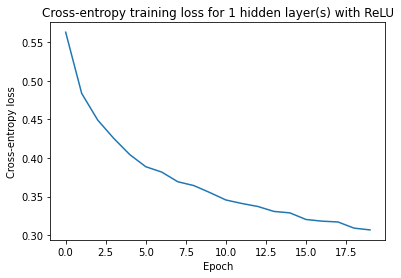

In [31]:
### plotting loss for 2 hidden layers (ReLU)

mlp2 = epoch_mini_batch(x_train, y_train, x_test, y_test, 1, [128], "ReLU", 0.1, 1000, 20, track_loss = True)
acc2 = evaluate_mlp_acc(mlp2, x_train, y_train, x_test, y_test, silent = False)

### Testing activation functions other than ReLU

The accuracy of the model on the training data: 88.71%
The accuracy of the model on the testing data: 86.0%




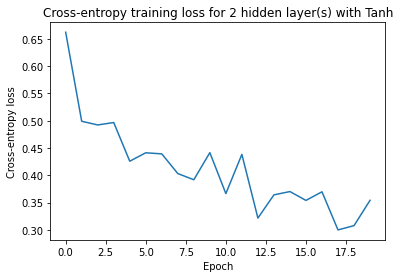

In [ ]:
### training and testing 2 hidden layers with Tanh activation functions

mlp2t = epoch_mini_batch(x_train, y_train, x_test, y_test, 2, [128, 128], "Tanh", 0.1, 1000, 20, track_loss = True)
acc2t = evaluate_mlp_acc(mlp2t, x_train, y_train, x_test, y_test, silent = False)

The accuracy of the model on the training data: 89.56%
The accuracy of the model on the testing data: 85.99%




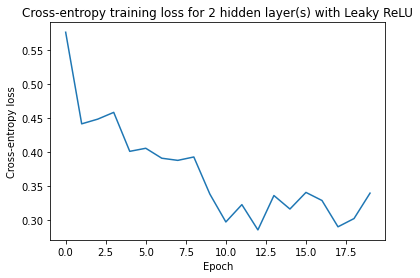

In [ ]:
### training and testing 2 hidden layers with leaky ReLU activation functions

mlp2l = epoch_mini_batch(x_train, y_train, x_test, y_test, 2, [128, 128], "Leaky ReLU", 0.1, 1000, 20, track_loss = True)
acc2l = evaluate_mlp_acc(mlp2l, x_train, y_train, x_test, y_test, silent = False)

### Adding L2 regularization

The accuracy of the model on the training data: 89.57%
The accuracy of the model on the testing data: 86.29%




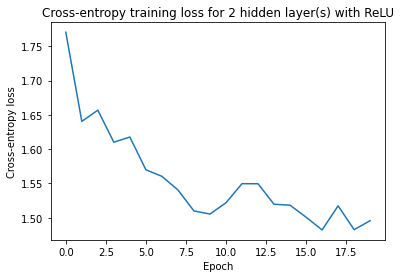

In [ ]:
### training and testing 2 hidden layers with ReLU activation functions and L2 regularization

mlp2reg = epoch_mini_batch(x_train, y_train, x_test, y_test, 2, [128, 128], "ReLU", 0.1, 1000, 20, track_loss = True, lambda_reg = 0.001)
acc2reg = evaluate_mlp_acc(mlp2reg, x_train, y_train, x_test, y_test, silent = False)

## Using a model trained on unnormalized images

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
The accuracy of the model on the training data: 10.0%
The accuracy of the model on the testing data: 10.0%




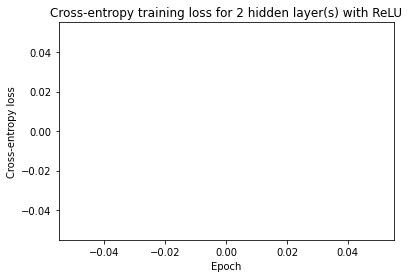

In [ ]:
### training and testing 2 hidden layers with ReLu activation functions

### faith - will fix this

mlp2ln = epoch_mini_batch(x_train_unprocessed, y_train, x_test_unprocessed, y_test, 2, [128, 128], "ReLU", 0.1, 1000, 2, track_loss = True)
acc2ln = evaluate_mlp_acc(mlp2ln, x_train_unprocessed, y_train, x_test_unprocessed, y_test, silent = False)